# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [2]:
# making an API call
import requests

pokemon = input('Enter a Pokemon: ')

url = f'https://pokeapi.co/api/v2/pokemon/{pokemon}/'

response = requests.get(url)

if response.status_code == 200:
    print('success')
    data = response.json()
else:
    print(f'ERROR, STATUS CODE {response.status_code}')

ModuleNotFoundError: No module named 'requests'

In [ ]:
print(data['name'])

pikachu


### Display a Pokemon's name, weight, abilities, and types

In [ ]:
# get the name
name = data['name']
print(data['name'])

pikachu


In [ ]:
# get types
types = data['types']

types = list(map(lambda x: x['type']['name'],types))
print(types)

['electric']


In [ ]:
# get weight
weight = data['weight']
print(weight)

60


In [ ]:
# get abilities
abilities = data['abilities']

abilities = list(map(lambda x: x['ability']['name'],abilities))
print(abilities)

['static', 'lightning-rod']


In [ ]:
# Create a structure for a single pokemon
class Pokemon:
    def __init__(self, name, types, weight, abilities):
        self.name = name
        self.types = types
        self.weight = weight
        self.abilities = abilities


In [ ]:
my_pokemon = Pokemon(name, types, weight, abilities)

In [ ]:
my_pokemon.name

'pikachu'

#### Create a function to Pull in your own Pokemon's data 

In [ ]:

def poke_api_call(pokemon):
     # Use the pokemon parameter to make a request to the pokeapi
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}/')
    # if the status code is 200:
    if response.status_code == 200:
        # Get the pokemon's data with the json method
        data = response.json()
        name = data['name']
        weight = data['weight']
        types = data['types']
        types = list(map(lambda x: x['type']['name'],types))
        abilities = data['abilities']
        abilities = list(map(lambda x: x['ability']['name'],abilities))
        pokemon = Pokemon(name, types, weight, abilities)
        return pokemon
    else:
        print(f'ERROR, STATUS CODE {response.status_code}')
    
pokemon1 = poke_api_call('pikachu')

In [ ]:
pokemon1.types

['electric']

In [ ]:
pokemon2 = poke_api_call('squirtle')
print(pokemon2.types)

['water']


Choose your pokemon

In [ ]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['mew', 'umbreon','tyranitar','sneasel','bisharp',778]


In [ ]:
print(random_team)


[381, 869, 799, 581, 4, 864]


In [ ]:
random_team = list(map(poke_api_call, random_team))

In [ ]:
for mon in random_team:
    print(mon.name)

latios
alcremie
guzzlord
swanna
charmander
cursola


In [ ]:
your_team = list(map(poke_api_call, your_team))

In [ ]:
for mon in your_team:
    print(mon.name)
    print(mon.types)

mew
['psychic']
umbreon
['dark']
tyranitar
['rock', 'dark']
sneasel
['dark', 'ice']
bisharp
['dark', 'steel']
mimikyu-disguised
['ghost', 'fairy']


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [ ]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for mon in your_team:
    my_six_pokemon[mon.name] = mon
    
print(my_six_pokemon)

{'mew': <__main__.Pokemon object at 0x0000026366BE76D0>, 'umbreon': <__main__.Pokemon object at 0x00000263656C4370>, 'tyranitar': <__main__.Pokemon object at 0x0000026366BE77C0>, 'sneasel': <__main__.Pokemon object at 0x0000026366BE7CD0>, 'bisharp': <__main__.Pokemon object at 0x0000026366BE75B0>, 'mimikyu-disguised': <__main__.Pokemon object at 0x0000026366BE7B50>}


In [ ]:
my_six_pokemon['mew'].types

['psychic']

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [ ]:
class Pokemon():
    def __init__(self, name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite = None
        self.poke_api_call()
        
    def poke_api_call(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        if response.status_code == 200:
            data = response.json()
            self.name = data['name']
            self.weight = data['weight']
            types = data['types']
            self.types = list(map(lambda x: x['type']['name'],types))
            abilities = data['abilities']
            self.abilities = list(map(lambda x: x['ability']['name'],abilities))
            self.sprite = data['sprites']['front_default']
           
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')

In [ ]:
pikachu = Pokemon('pikachu')
print(pikachu)

pikachu


### Let's Catch some Pokemon

In [ ]:
class Pokedex:
    def __init__(self):
        self.pokemon = {}
        
    def add_pokemon(self, name):
        new_pokemon = Pokemon(name)
        self.pokemon[new_pokemon.name] = new_pokemon


In [ ]:
my_pokedex = Pokedex()


In [ ]:
my_pokedex.add_pokemon('pikachu')

In [ ]:
my_pokedex.add_pokemon(10)


In [ ]:
my_pokedex.pokemon

{'pikachu': <__main__.Pokemon at 0x26366beb640>,
 'caterpie': <__main__.Pokemon at 0x26366beba30>}

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [ ]:
# Display an image in Jupyter notebook
from IPython.display import Image

#display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [ ]:
# recreate your pokemon class here
class Pokemon():
    def __init__(self, name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite = None
        self.poke_api_call()
        
    def poke_api_call(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        if response.status_code == 200:
            data = response.json()
            self.name = data['name']
            self.weight = data['weight']
            types = data['types']
            self.types = list(map(lambda x: x['type']['name'],types))
            abilities = data['abilities']
            self.abilities = list(map(lambda x: x['ability']['name'],abilities))
            self.sprite = data['sprites']['front_default']
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')
    def display_pokemon(self):
        display(Image(self.sprite, width = 300))

In [ ]:
pikachu = Pokemon('pikachu')

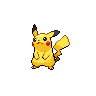

In [ ]:
# Calling our new method
pikachu.display_pokemon()

In [ ]:
squirtle = Pokemon(7)

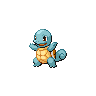

In [ ]:
squirtle.display_pokemon()

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [ ]:
class Pokemon():
    def __init__(self, name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite = None
        self.poke_api_call(self.name)
        
    def poke_api_call(self,name):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{name}/')
        if response.status_code == 200:
            data = response.json()
            self.name = data['name']
            self.weight = data['weight']
            types = data['types']
            self.types = list(map(lambda x: x['type']['name'],types))
            abilities = data['abilities']
            self.abilities = list(map(lambda x: x['ability']['name'],abilities))
            self.sprite = data['sprites']['front_default']
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')
    def display_pokemon(self):
        display(Image(self.sprite, width = 300))
    def evolve(self):
        new_mon = input(f"Woah! {self.name} is evolving!  ")
        self.poke_api_call(new_mon)
    def true_evolve(self):
        response_species = requests.get(f'https://pokeapi.co/api/v2/pokemon-species/{self.name}/')
        if response_species.status_code == 200:
            species_data = response_species.json()
            response_chain = requests.get(species_data['evolution_chain']['url'])
            if response_chain.status_code == 200:
                chain_data = response_chain.json()
                newer_mon = chain_data['chain']['evolves_to'][0]['species']['name']
                newest_mon = chain_data['chain']['evolves_to'][0]['evolves_to'][0]['species']['name']
                if self.name != newest_mon and self.name != newer_mon:
                    self.poke_api_call(newer_mon)
                elif self.name == newer_mon:
                    self.poke_api_call(newest_mon)
                else:
                    print(f'{self.name} can not evolve further')
            else:
                print(f'ERROR, STATUS CODE {response.status_code}')
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')  

Now let's evolve a few

In [ ]:
pikachu = Pokemon(25)

In [ ]:
pikachu.evolve()

Woah! raichu is evolving!  arceus


In [ ]:
print(pikachu.name)

arceus


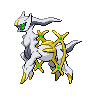

In [ ]:
pikachu.display_pokemon()

In [ ]:
squirtle = Pokemon('squirtle')

In [ ]:
squirtle.evolve()

In [ ]:
print(squirtle.name)

wartortle


#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [ ]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []

In [ ]:
pikachu.teach_move()


What move would you like to teach pikachu? spark
pikachu learned spark!


In [ ]:
pikachu.show_moves()

pikachu's moves'
thunder
surf
earthquake
